In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/kaggle/input/traindata/train1.csv")
data.columns = ['Date', 'Price']

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y', errors='coerce')

# # Check for any parsing errors
# if data['Date'].isnull().any():
#     print("Warning: Some dates couldn't be parsed. Check for invalid formats.")
#     print(data[data['Date'].isnull()])  # Print rows with invalid dates

# # Drop rows with invalid dates (if needed)
# data = data.dropna(subset=['Date'])

# Set the 'Date' column as the index
data = data.set_index('Date')

print(data.head())


            Price
Date             
2014-01-01      9
2014-01-02     14
2014-01-03     11
2014-01-04     20
2014-01-05     17


In [3]:
print(data)

            Price
Date             
2014-01-01      9
2014-01-02     14
2014-01-03     11
2014-01-04     20
2014-01-05     17
...           ...
2017-09-26     18
2017-09-27     27
2017-09-28     23
2017-09-29     28
2017-09-30     30

[1369 rows x 1 columns]


In [4]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

print("Missing values in each column:")
print(missing_values)

# Optionally, display rows with missing values
if missing_values.any():
    print("\nRows with missing values:")
    print(data[data.isnull().any(axis=1)])


Missing values in each column:
Price    0
dtype: int64


<Axes: xlabel='Date'>

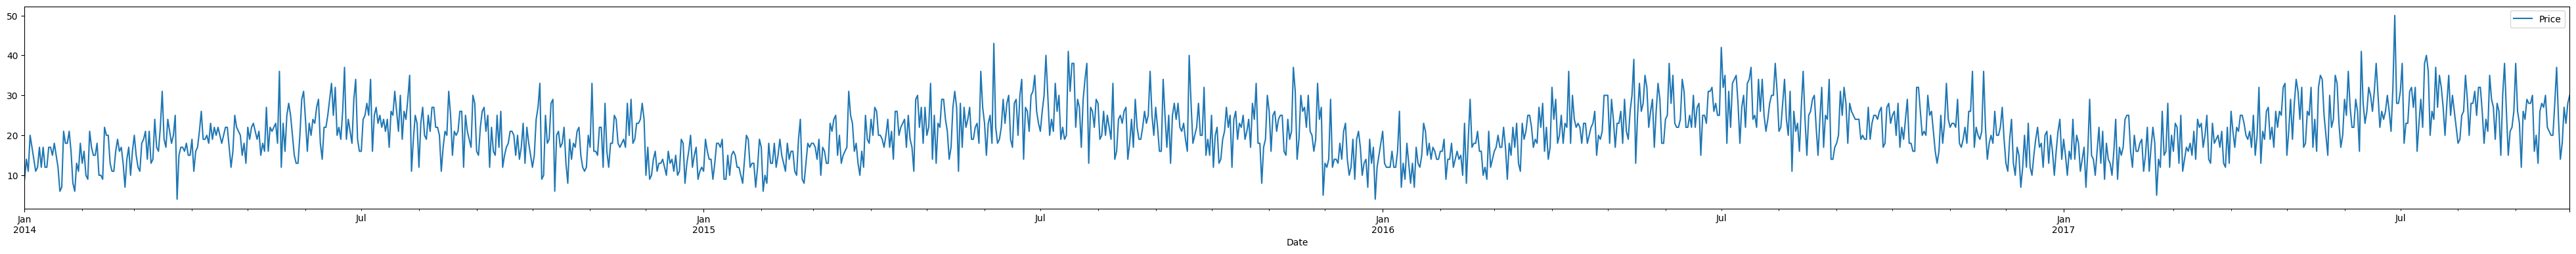

In [5]:
data.plot(figsize=(50,4))

## Handling missing values

### Mean inputation

<Axes: xlabel='Date'>

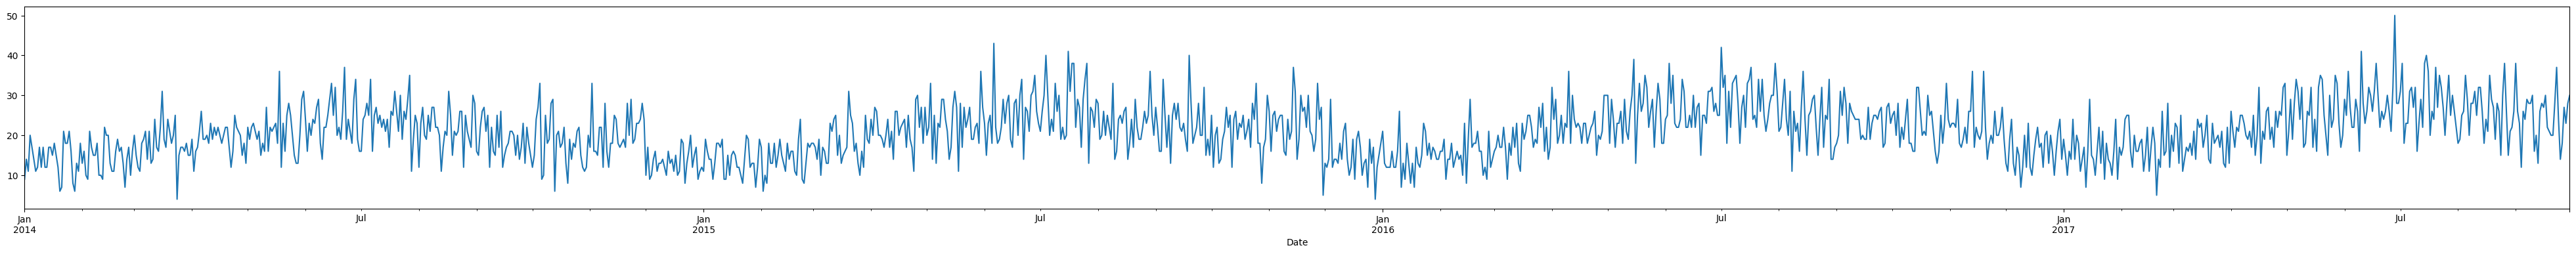

In [6]:
data = data.assign(Mean_imputation = data['Price'].fillna(data['Price'].mean()))
data['Mean_imputation'].plot(figsize=(50,4))

### Linear interpolation
You draw a straight line joining the next and previous points of the missing values in the data.

<Axes: xlabel='Date'>

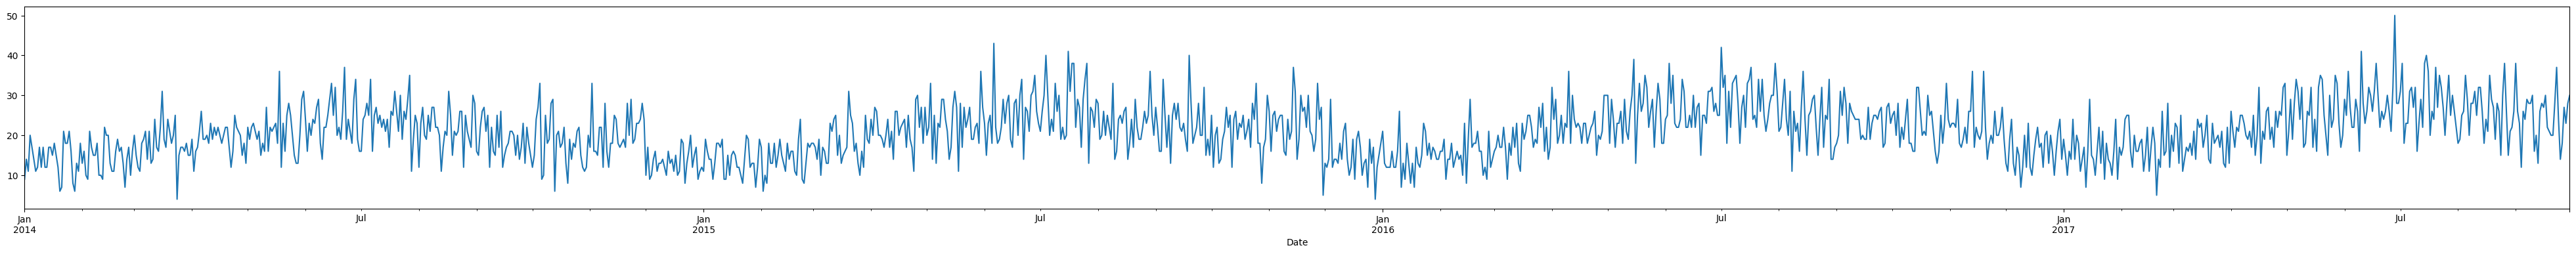

In [7]:
data = data.assign(Linear_Interpolation = data['Price'].interpolate(method='linear'))
data['Linear_Interpolation'].plot(figsize=(50,4))

## Outlier detection

### Box plot and interquartile range

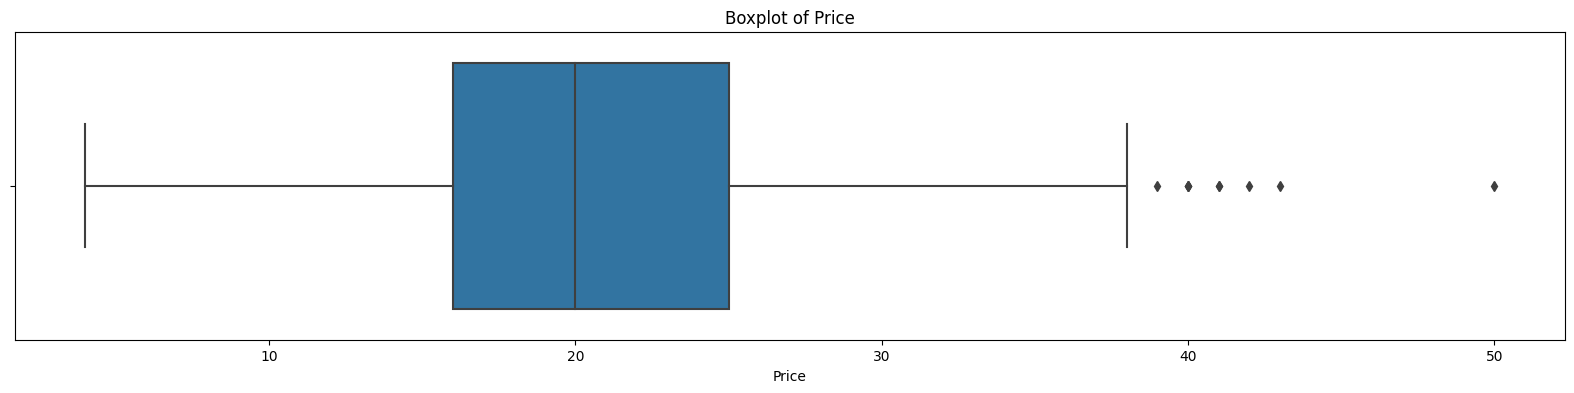

In [8]:

# Create the boxplot with Price on the x-axis
fig, ax = plt.subplots(figsize=(20, 4))
sns.boxplot(x=data['Price'], whis=1.5, ax=ax)

plt.title("Boxplot of Price")
plt.show()


In [9]:
# Calculate Quartiles
Q1 = data['Price'].quantile(0.25)  # First quartile (25th percentile)
Q2 = data['Price'].quantile(0.50)  # Median (50th percentile)
Q3 = data['Price'].quantile(0.75)  # Third quartile (75th percentile)

# Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers = data[(data['Price'] < lower_bound) | (data['Price'] > upper_bound)]

# Print the results
print(f"First Quartile (Q1): {Q1}")
print(f"Median (Q2): {Q2}")
print(f"Third Quartile (Q3): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Number of Outliers: {outliers.shape[0]}")


First Quartile (Q1): 16.0
Median (Q2): 20.0
Third Quartile (Q3): 25.0
IQR: 9.0
Lower Bound: 2.5
Upper Bound: 38.5
Number of Outliers: 9


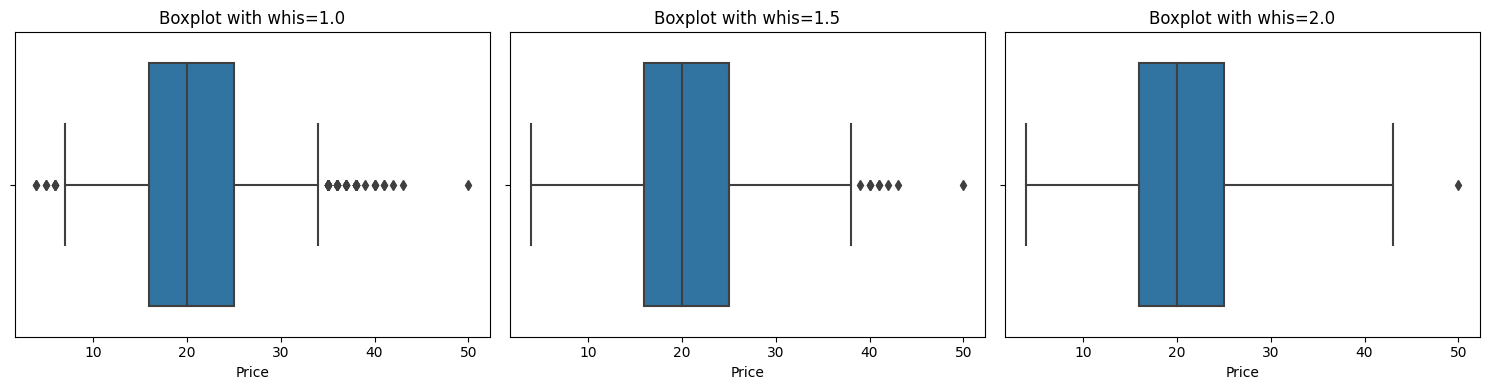

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example with different whis values
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, whis in zip(axes, [1.0, 1.5, 2.0]):
    sns.boxplot(x=data['Price'], whis=whis, ax=ax)
    ax.set_title(f'Boxplot with whis={whis}')


plt.tight_layout()
plt.show()


### Histogram plot

<Axes: >

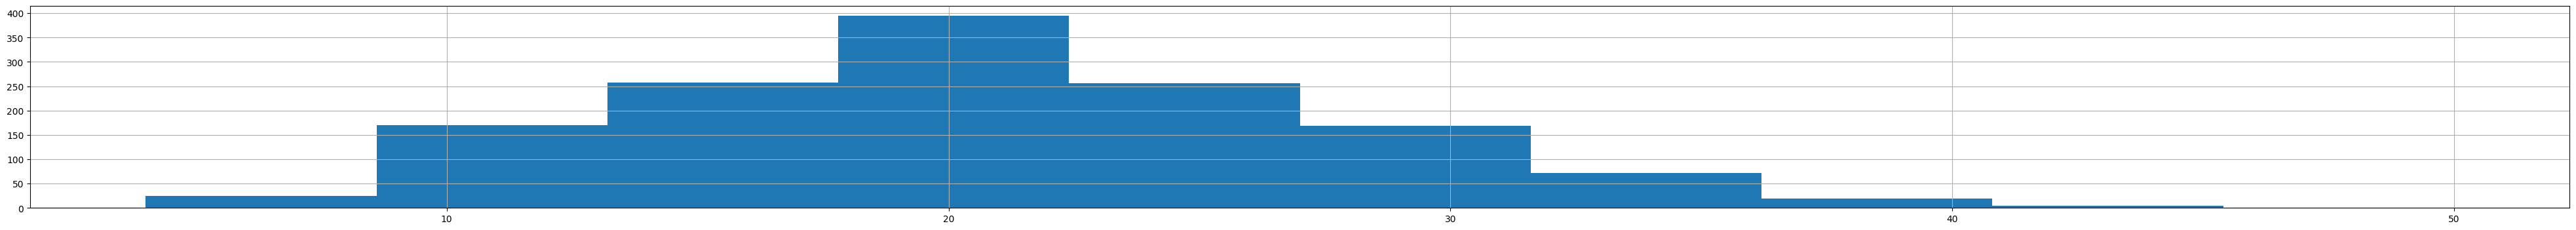

In [11]:
data['Price'].hist(figsize=(50,4))

In [12]:
data.head()

,Price,Mean_imputation,Linear_Interpolation
Date,,,
2014-01-01,9,9,9
2014-01-02,14,14,14
2014-01-03,11,11,11
2014-01-04,20,20,20
2014-01-05,17,17,17


In [13]:
data = data.drop(['Price', 'Mean_imputation'], axis=1)

In [14]:
data.rename(columns={'Linear_Interpolation' : 'Price'}, inplace=True)

## Time series decomposition

### Additive seasonal decomposition

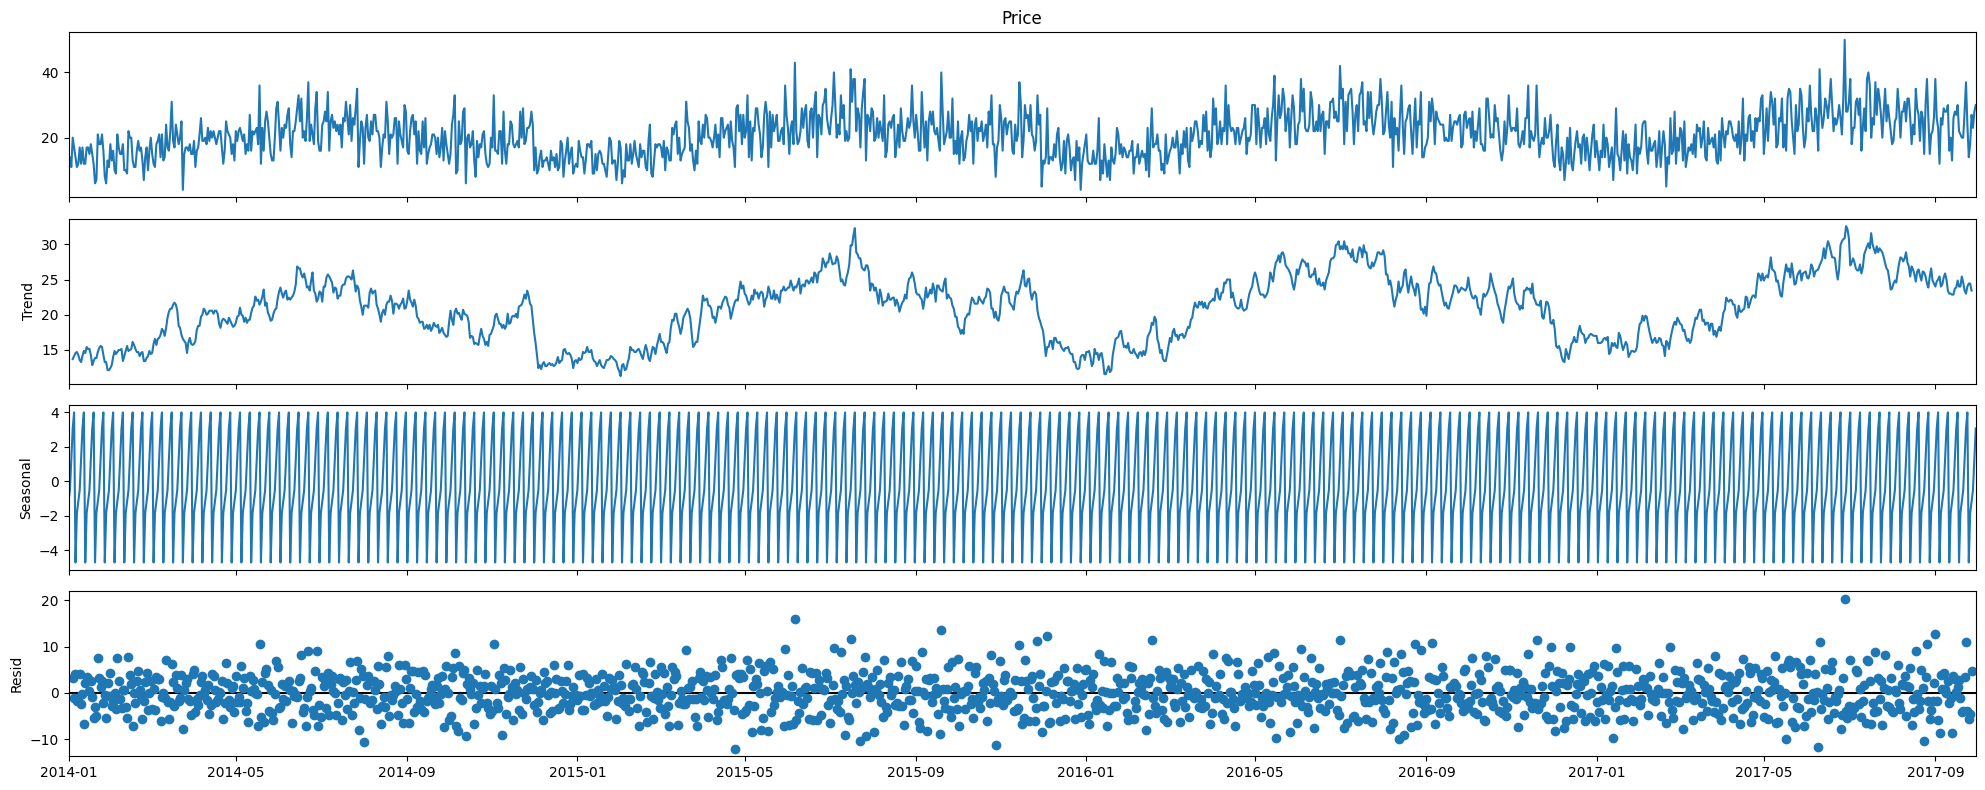

In [15]:
from pylab import rcParams
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Set figure size
rcParams['figure.figsize'] = 20, 8

# Perform decomposition
decomposition = sm.tsa.seasonal_decompose(data['Price'], model='additive')

# Plot decomposition
fig = decomposition.plot()

# Save the figure
fig.savefig('/kaggle/working/decomposition_plot.png')

# Display the plot
plt.show()


### Multiplicative seasonal decomposition

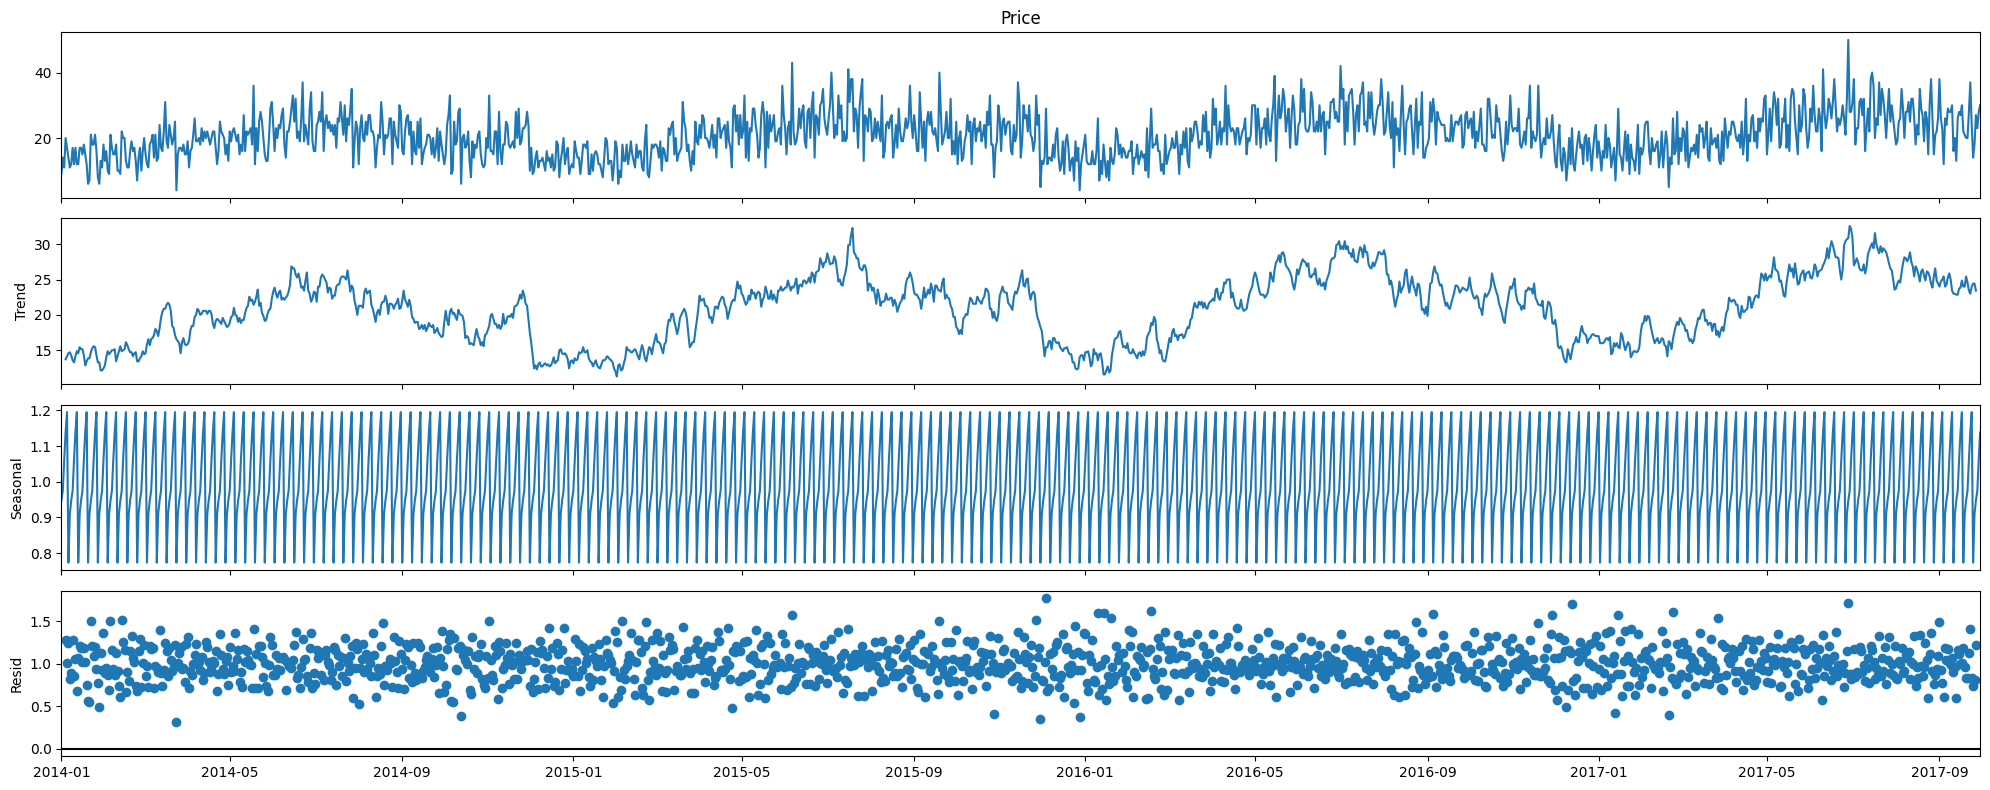

In [16]:
decomposition = sm.tsa.seasonal_decompose(data['Price'], model='multiplicative')
fig = decomposition.plot()
plt.show()

In [17]:
print(data)

            Price
Date             
2014-01-01      9
2014-01-02     14
2014-01-03     11
2014-01-04     20
2014-01-05     17
...           ...
2017-09-26     18
2017-09-27     27
2017-09-28     23
2017-09-29     28
2017-09-30     30

[1369 rows x 1 columns]


In [18]:
train_len = 1200
train = data[0:train_len]
test = data[train_len:]

### Naive method

Forecast = Last month’s data

Or the last data of the train set, which will be assigned to all the records of the test data.

In [19]:
# Creating a new dataframe by copying the test data
# Because we will forecast the last two years data and comapre the forecast in this new coppied dataframe.
y_hat_naive = test.copy()
y_hat_naive.head()

,Price
Date,
2017-04-15,20
2017-04-16,32
2017-04-17,13
2017-04-18,21
2017-04-19,19


In [20]:
y_hat_naive['naive_forecast'] = train['Price'][train_len-1]

In [21]:
y_hat_naive.head()

,Price,naive_forecast
Date,,
2017-04-15,20,15
2017-04-16,32,15
2017-04-17,13,15
2017-04-18,21,15
2017-04-19,19,15


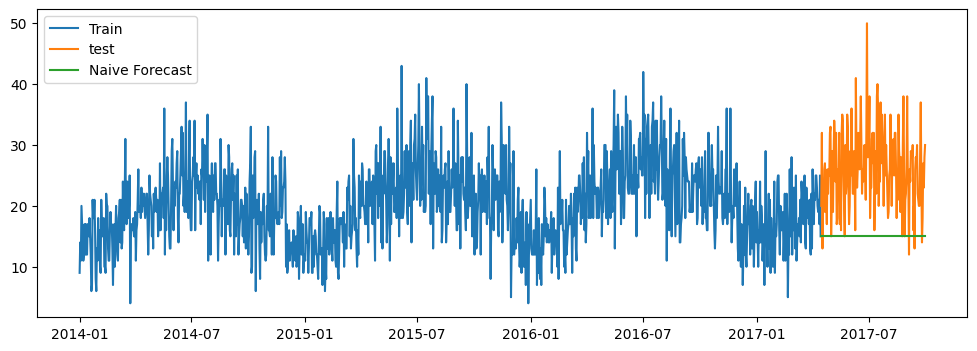

In [22]:
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive Forecast')
plt.legend(loc='best')
plt.show()

### Simple average method

In [23]:
y_hat_avg = test.copy()

In [24]:
y_hat_avg['avg_forecast'] = train['Price'].mean()

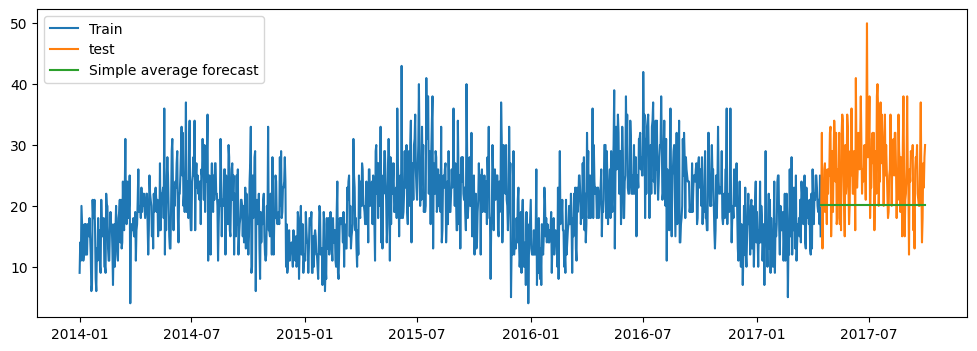

In [25]:
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.show()

In [26]:

rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_naive['naive_forecast'])).round(2)
mape = round(np.mean(np.abs((test['Price'] - y_hat_naive['naive_forecast'])/test['Price'])*100),2)
print("RMSE:",rmse)
print("MAPE:",mape)

RMSE: 12.78
MAPE: 39.34


In [27]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_avg['avg_forecast'])).round(2)
mape = round(np.mean(np.abs((test['Price'] - y_hat_avg['avg_forecast'])/test['Price'])*100),2)
print("RMSE:",rmse)
print("MAPE: ",mape)

RMSE: 8.71
MAPE:  25.02


## Simple moving average method

In [28]:
# We are copying entire data because we want to see the forecast for the entire dataset (train and test)
y_hat_sma = data.copy()
# Moving average window. We will take the avg of last 12 months for forecasting the future. 
ma_window = 100
y_hat_sma['sma_forecast'] = data['Price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

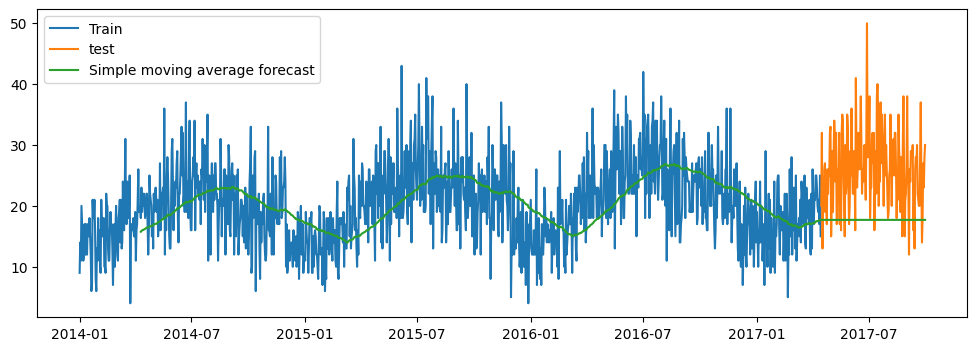

In [29]:
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.show()

In [30]:
# We are taking only the test data points of y_hat_sma. After the train_len data points
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = round(np.mean(np.abs((test['Price'] - y_hat_sma['sma_forecast'][train_len:])/test['Price'])*100),2)
print("RMSE:",rmse)
print("MAPE:",mape)

RMSE: 10.53
MAPE: 30.82


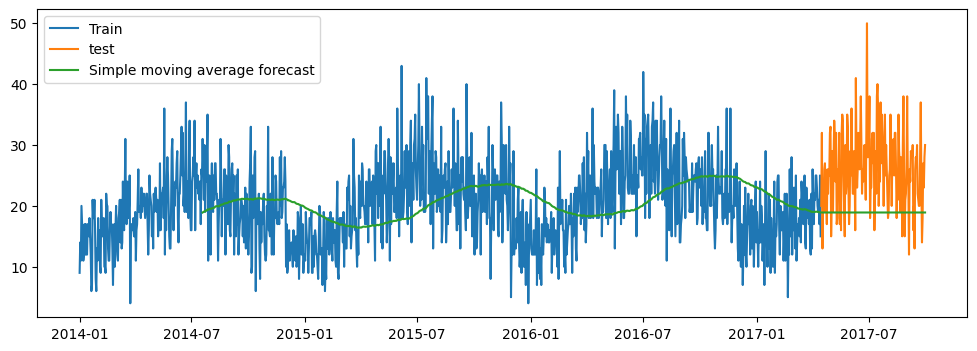

In [31]:
ma_window = 200
y_hat_sma['sma_forecast'] = data['Price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.show()

# Exponential Smoothing Family

- Simple exponential smoothing (Captures - Only Level)
- Holt's exponential smoothing (Level+Trend)
- Holt's Winter exponential smoothing (Level+Trend+Seasonality)

In [32]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# Instantiate the model
model = SimpleExpSmoothing(train['Price'])
# optimized = False means, we are explicitly definign the smoothing_level.
# optimized = True means - Automitacially it will define a smoothing_level based on RMSE
model_fit = model.fit( optimized=True)
model_fit.params

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 0.08911751004275763,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 9.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [33]:
y_hat_ses = test.copy()
# Forecast for 24 months
y_hat_ses['ses_forecast'] = model_fit.forecast(169)

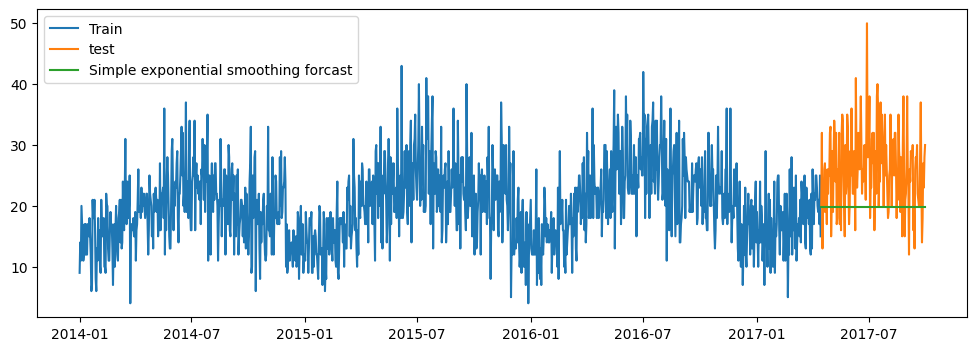

In [34]:
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

In [35]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_ses['ses_forecast'])).round(2)
mape = round(np.mean(np.abs((test['Price'] - y_hat_ses['ses_forecast'])/test['Price'])*100),2)
print("RMSE:",rmse)
print("MAPE:",mape)

RMSE: 8.88
MAPE: 25.49


### Holt's Exponential Smoothing method

Captures both Level and Trend .

In [36]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Price']), seasonal_periods = 12, trend='additive', seasonal=None)
model_fit = model.fit( optimized=True)
model_fit.params

{'smoothing_level': 0.08083579831628987,
 'smoothing_trend': 0.01916815595414394,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 13.316679348049165,
 'initial_trend': 0.047120059362609434,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [37]:
y_hat_holt = test.copy()
# We are forecasting for next 24 months
y_hat_holt['holt_forecast'] = model_fit.forecast(169)

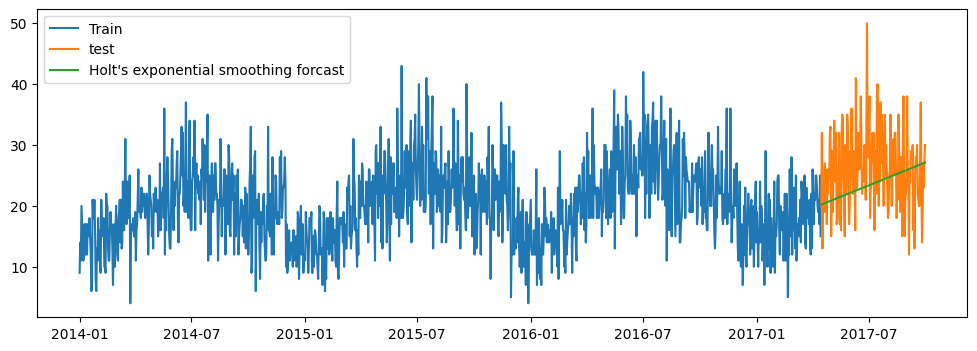

In [38]:
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

In [39]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_holt['holt_forecast'])).round(2)
mape = round(np.mean(np.abs((test['Price'] - y_hat_holt['holt_forecast'])/test['Price'])*100),2)
print("RMSE:",rmse)
print("MAPE: ",mape)

RMSE: 7.1
MAPE:  21.48


## Holt-Winters's Exponential Smoothing

Captures Level, Trend and Seasonality.

In [40]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Price']), seasonal_periods = 12, trend='additive', seasonal='additive')
model_fit = model.fit(optimized=True)
model_fit.params

{'smoothing_level': 0.08170730510053338,
 'smoothing_trend': 0.018376485925642106,
 'smoothing_seasonal': 5.850727839314069e-06,
 'damping_trend': nan,
 'initial_level': 13.384837806013891,
 'initial_trend': 0.0471719309041303,
 'initial_seasons': array([-0.09900652,  0.20524994,  0.25904973, -0.14606947, -0.23202644,
        -0.43759206, -0.32329349, -0.07924841, -0.74535076,  0.54895331,
         0.25402356, -0.33199406]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [41]:
Model_HWAM = model_fit
# Forecast for last 24 months
y_hat_hwa['hwa_forecast'] = model_fit.forecast(169)

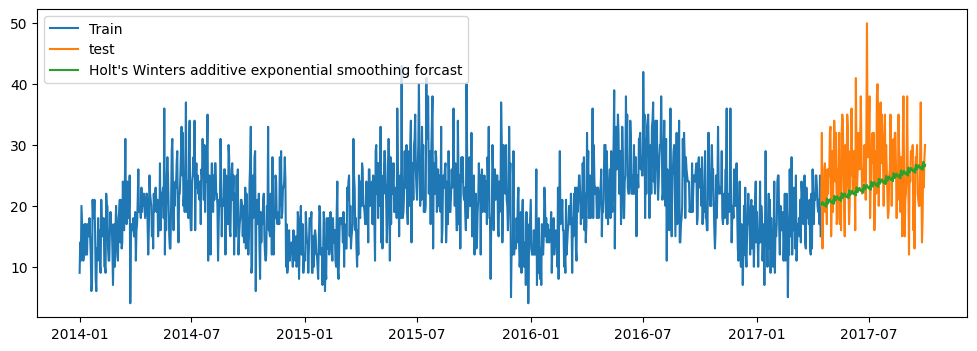

In [42]:
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='test')
plt.plot(y_hat_hwa['hwa_forecast'], label='Holt\'s Winters additive exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

In [43]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_hwa['hwa_forecast'])).round(2)
mape = round(np.mean(np.abs((test['Price'] - y_hat_hwa['hwa_forecast'])/test['Price'])*100),2)
print("RMSE: ",rmse)
print("MAPE: ",mape)


RMSE:  7.15
MAPE:  21.65


In [44]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Price']), seasonal_periods = 12, trend='additive', seasonal='multiplicative')
model_fit = model.fit(optimized=True)
model_fit.params

{'smoothing_level': 0.08520315368557173,
 'smoothing_trend': 0.0006283543570643862,
 'smoothing_seasonal': 0.003420723666578497,
 'damping_trend': nan,
 'initial_level': 6.835599685134937,
 'initial_trend': 0.002726990426929107,
 'initial_seasons': array([2.00130751, 2.03371488, 2.05186595, 2.01293805, 1.98631769,
        1.97038328, 2.01331444, 2.02764041, 1.94171686, 2.0837445 ,
        2.04482547, 1.9770797 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [45]:
Model_HWMM = model_fit
# Forecast for last 24 months
y_hat_hwm['hwm_forecast'] = model_fit.forecast(169)

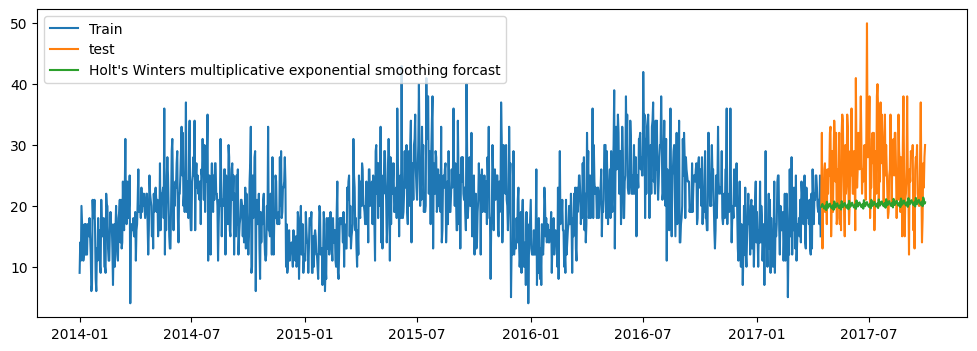

In [46]:
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='test')
plt.plot(y_hat_hwm['hwm_forecast'], label='Holt\'s Winters multiplicative exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

In [47]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_hwm['hwm_forecast'])).round(2)
mape = round(np.mean(np.abs((test['Price'] - y_hat_hwm['hwm_forecast'])/test['Price'])*100),2)
print("RMSE: ",rmse)
print("MAPE: ",mape)


RMSE:  8.62
MAPE:  24.92


In [48]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Price'])
adf_test

(-2.3886947413503266,
 0.14495269098248575,
 21,
 1347,
 {'1%': -3.4352139981780865,
  '5%': -2.863688081179776,
  '10%': -2.567913641703717},
 8202.411438372725)

In [49]:
print('ADF stats: %f' % adf_test[0])
print('p-value: %f' %adf_test[1])
print('Critical value @ 0.05: %.2f' % adf_test[4]['5%'])

ADF stats: -2.388695
p-value: 0.144953
Critical value @ 0.05: -2.86


In [50]:
from scipy.stats import boxcox
import pandas as pd

# Assume 'data' is a DataFrame with a 'Price' column
# Ensure the data contains only positive values for Box-Cox
positive_data = data['Price'][data['Price'] > 0]

# Find the optimal lambda using boxcox with lmbda=None
data_boxcox, best_lambda = boxcox(positive_data, lmbda=None)

# Display the best lambda
print(f"Optimal Lambda: {best_lambda}")

# Create a Pandas Series for the transformed data
data_boxcox_series = pd.Series(data_boxcox, index=positive_data.index)

# Check the head of the transformed data
print(data_boxcox_series.head())


Optimal Lambda: 0.5977250286867972
Date
2014-01-01    4.548176
2014-01-02    6.428537
2014-01-03    5.340978
2014-01-04    8.353661
2014-01-05    7.425466
dtype: float64


In [51]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Price'], lmbda=0), data.index)
data_boxcox.head()
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), index=data.index)
data_boxcox_diff.dropna(inplace=True)

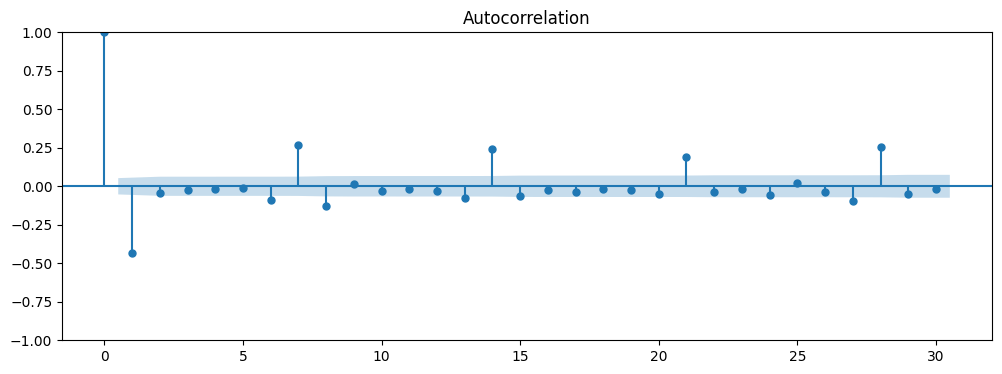

In [52]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

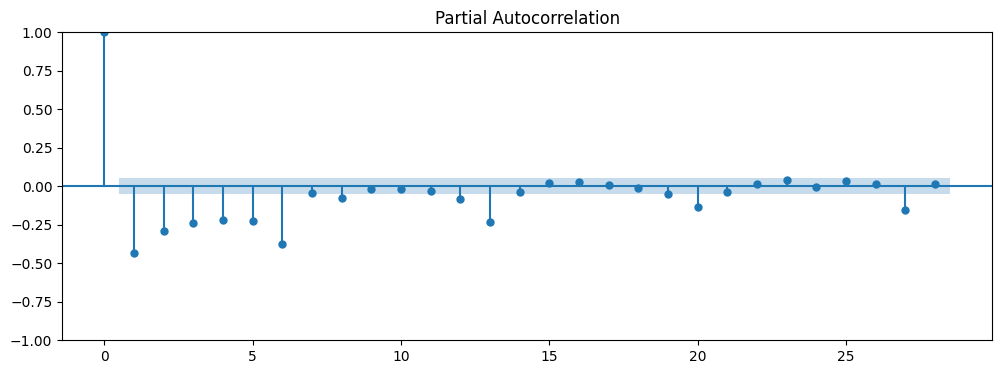

In [53]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags=28)
plt.show()

In [54]:
# Splitting data_boxcox_diff
# Taking train_len-1 because we have deleted the forst observation
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

## ARIMA


In [55]:
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from statsmodels.tsa.arima.model import ARIMA

# Apply inverse Box-Cox transformation to a given data
def reverse_boxcox(transformed_data, lambda_value):
    return inv_boxcox(transformed_data, lambda_value)

# Fit the ARIMA model on the training data
model = ARIMA(train_data_boxcox_diff, order=(5, 0, 5))  # Use the chosen order
results = model.fit()

# Predict values for the test dataset
forecast_boxcox = results.forecast(steps=len(test_data_boxcox_diff))

# Ensure forecast is 1D array
forecast_boxcox = np.array(forecast_boxcox).flatten()

# Reverse Box-Cox transformation for both forecasted and actual values
lambda_value = 0 # Replace with your actual Box-Cox lambda value used during transformation

# Reverse Box-Cox for forecast and test data
forecast_reversed = reverse_boxcox(forecast_boxcox, lambda_value)
actual_reversed = reverse_boxcox(test_data_boxcox_diff, lambda_value)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_reversed, forecast_reversed))

# Calculate MAPE (Avoid division by zero by checking actual values)
non_zero_indices = actual_reversed != 0  # Exclude zeros
actual_non_zero = actual_reversed[non_zero_indices]
forecast_non_zero = forecast_reversed[non_zero_indices]

# Calculate MAPE for non-zero values
mape = np.mean(np.abs((actual_reversed - forecast_reversed) / actual_reversed)) * 100

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE: 0.3593532058021029
MAPE: 27.75103574617796%


## LSTM

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0669
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0167
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0149
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0154
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0147
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0150
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0152
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0154
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0161
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0145
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0145
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0153
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0148
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0144
Epoch 15/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0151
Epoc

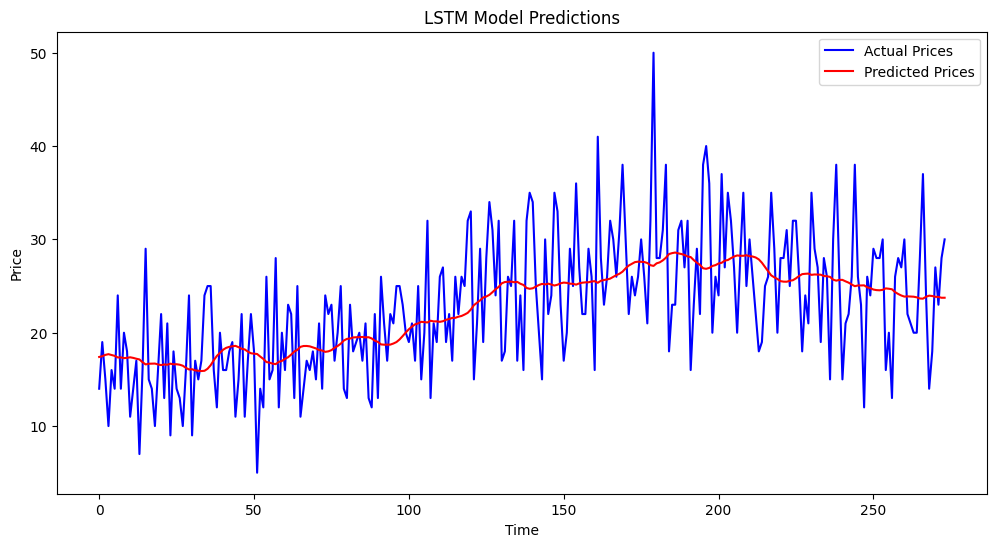

In [57]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Ensure reproducibility
np.random.seed(42)

# Step 1: Data Preparation
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Price'].values.reshape(-1, 1))

# Define a function to create sequences
def create_sequences(data, time_steps):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(x), np.array(y)

# Define time step size
time_steps = 60

# Create sequences for training and testing
train_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_len]
test_data = scaled_data[train_len - time_steps:]

x_train, y_train = create_sequences(train_data, time_steps)
x_test, y_test = create_sequences(test_data, time_steps)

# Reshape input data to 3D for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Step 2: Build the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 3: Train the Model
model.fit(x_train, y_train, batch_size=32, epochs=50, verbose=1)

# Step 4: Make Predictions
# Predict on the test set
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Inverse transform the actual test values
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


# Step 5: Evaluate the Model
rmse = np.sqrt(np.mean(np.square(actual_prices - predicted_prices)))
print(f"RMSE: {rmse}")

# Calculate MAPE
mape = np.mean(np.abs((actual_prices - predicted_prices) / actual_prices)) * 100
print(f"MAPE: {mape}%")

# Step 6: Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label="Actual Prices", color='blue')
plt.plot(predicted_prices, label="Predicted Prices", color='red')
plt.title("LSTM Model Predictions")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Prophet Model

05:20:49 - cmdstanpy - INFO - Chain [1] start processing
05:20:49 - cmdstanpy - INFO - Chain [1] done processing


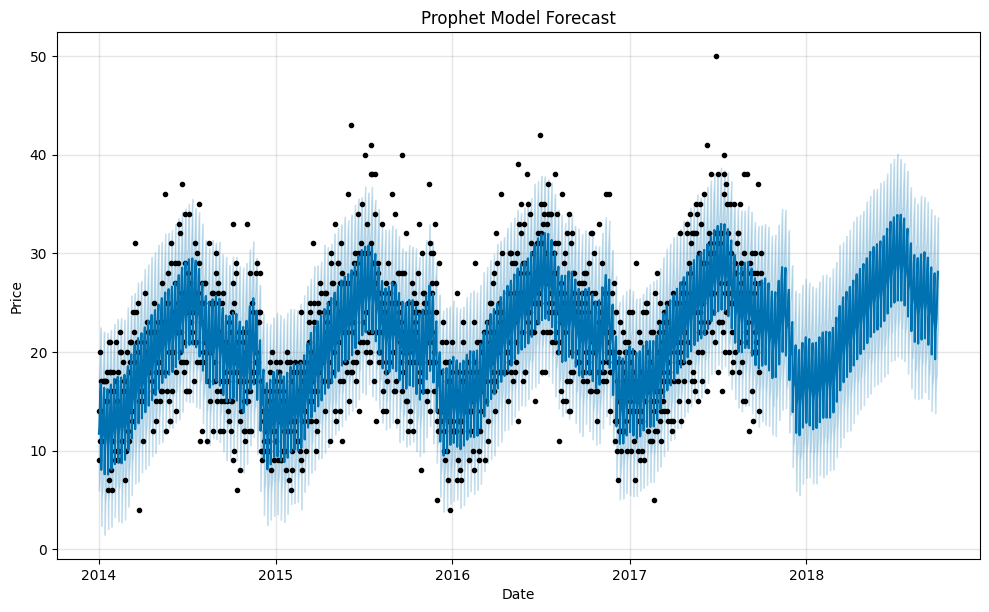

RMSE: 4.4942913012708505
MAPE: 19.64123880673876%


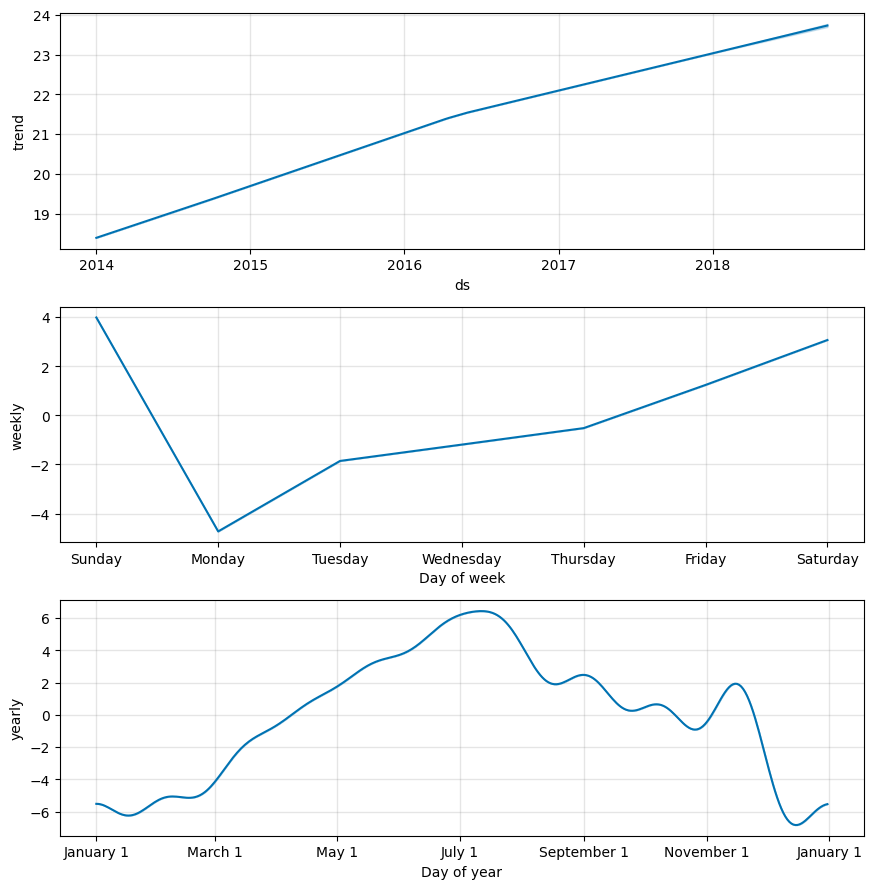

In [58]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Prepare Data for Prophet
# Prophet requires specific column names: 'ds' for datetime and 'y' for the target variable.
prophet_data = data.reset_index()[['Date', 'Price']]
prophet_data.rename(columns={'Date': 'ds', 'Price': 'y'}, inplace=True)

# Step 2: Initialize the Prophet Model
model = Prophet()

# Step 3: Fit the Model
model.fit(prophet_data)

# Step 4: Create Future Dataframe
# Define the prediction period (e.g., 365 days into the future)
future = model.make_future_dataframe(periods=365)

# Step 5: Forecast
forecast = model.predict(future)

# Step 6: Plot the Forecast
fig = model.plot(forecast)
plt.title("Prophet Model Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

# Step 7: Evaluate the Model (Optional)
# Filter predictions to match the test data range
forecast_test = forecast[forecast['ds'].isin(data.index)]

# Calculate RMSE and MAPE
from sklearn.metrics import mean_squared_error
import numpy as np

actual = prophet_data['y'].values
predicted = forecast_test['yhat'].values[:len(actual)]

rmse = np.sqrt(mean_squared_error(actual, predicted))
mape = np.mean(np.abs((actual - predicted) / actual)) * 100

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")

# Step 8: Plot Components
# This provides insights into trend, seasonality, and residuals
fig2 = model.plot_components(forecast)
plt.show()

## Random Forest

RMSE: 5.6127004091037085
MAPE: 22.418125557592017%


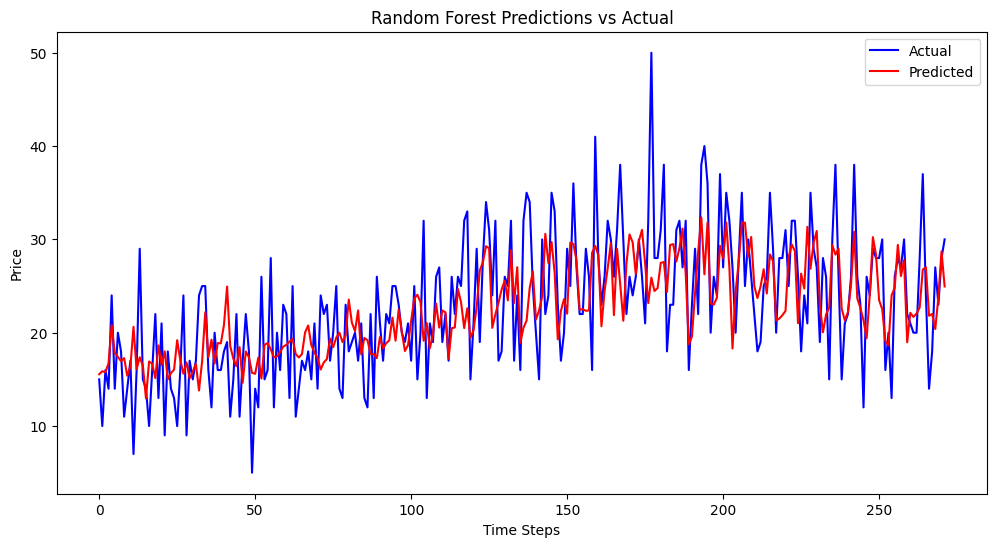

In [59]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Data Preparation
# Create lagged features
def create_lagged_features(data, lag=1):
    df = pd.DataFrame(data)
    for i in range(1, lag + 1):
        df[f'lag_{i}'] = df[0].shift(i)
    return df.dropna()

# Prepare data with lagged features
lag = 10  # Number of lags to include
lagged_data = create_lagged_features(data['Price'].values, lag=lag)

# Split features and target
X = lagged_data.iloc[:, 1:].values  # Lagged features
y = lagged_data.iloc[:, 0].values  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 2: Build and Train the Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 3: Make Predictions
y_pred = rf_model.predict(X_test)

# Step 4: Evaluate the Model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")

# Step 5: Visualization
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Actual', color='blue')
plt.plot(range(len(y_pred)), y_pred, label='Predicted', color='red')
plt.title("Random Forest Predictions vs Actual")
plt.xlabel("Time Steps")
plt.ylabel("Price")
plt.legend()
plt.show()

## Gradient Boost with Grid Search


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
RMSE: 5.746773164831705
MAPE: 22.656818954504377%


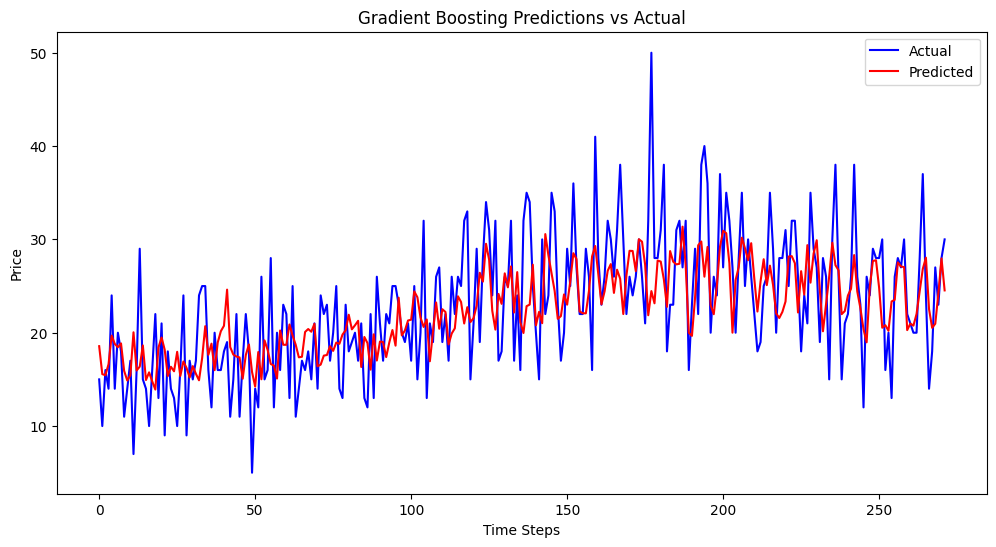

In [60]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Data Preparation
# Create lagged features
def create_lagged_features(data, lag=1):
    df = pd.DataFrame(data)
    for i in range(1, lag + 1):
        df[f'lag_{i}'] = df[0].shift(i)
    return df.dropna()

# Prepare data with lagged features
lag = 10  # Number of lags to include
lagged_data = create_lagged_features(data['Price'].values, lag=lag)

# Split features and target
X = lagged_data.iloc[:, 1:].values  # Lagged features
y = lagged_data.iloc[:, 0].values  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 2: Define Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Step 3: Set Hyperparameter Grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Step 4: Perform Grid Search
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best Parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Step 5: Train Gradient Boosting Model with Best Parameters
best_gbr = grid_search.best_estimator_

# Step 6: Make Predictions
y_pred = best_gbr.predict(X_test)

# Step 7: Evaluate the Model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")

# Step 8: Visualization
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Actual', color='blue')
plt.plot(range(len(y_pred)), y_pred, label='Predicted', color='red')
plt.title("Gradient Boosting Predictions vs Actual")
plt.xlabel("Time Steps")
plt.ylabel("Price")
plt.legend()
plt.show()

## Gradient Boost without Grid Search

RMSE: 5.73338898289401
MAPE: 22.74102581811256%


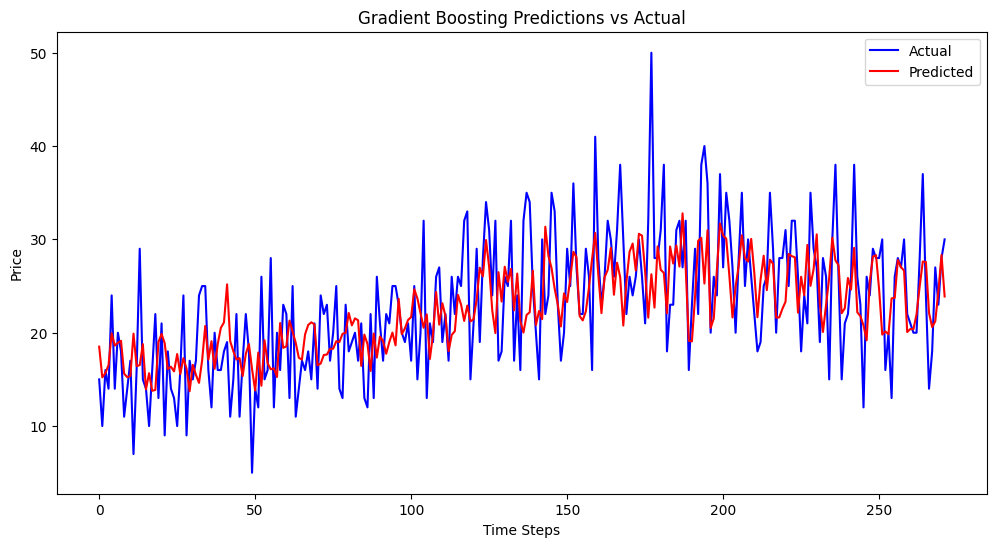

In [61]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Data Preparation
# Create lagged features
def create_lagged_features(data, lag=1):
    df = pd.DataFrame(data)
    for i in range(1, lag + 1):
        df[f'lag_{i}'] = df[0].shift(i)
    return df.dropna()

# Prepare data with lagged features
lag = 10  # Number of lags to include
lagged_data = create_lagged_features(data['Price'].values, lag=lag)

# Split features and target
X = lagged_data.iloc[:, 1:].values  # Lagged features
y = lagged_data.iloc[:, 0].values  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 2: Define and Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
    n_estimators=100,      # Number of trees
    learning_rate=0.1,     # Step size
    max_depth=3,           # Maximum depth of trees
    random_state=42
)

# Train the model
gbr.fit(X_train, y_train)

# Step 3: Make Predictions
y_pred = gbr.predict(X_test)

# Step 4: Evaluate the Model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")

# Step 5: Visualization
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Actual', color='blue')
plt.plot(range(len(y_pred)), y_pred, label='Predicted', color='red')
plt.title("Gradient Boosting Predictions vs Actual")
plt.xlabel("Time Steps")
plt.ylabel("Price")
plt.legend()
plt.show()

In [63]:

# Initialize a dictionary to store model results
results_dict = {}

# Example RMSE and MAPE for each model (replace with actual calculated values)
# Naive Forecast


# Average Forecast
avg_rmse = 12.78  # Replace with your actual RMSE
avg_mape = 39.34   # Replace with your actual MAPE
results_dict['Average Forecast'] = {'RMSE': avg_rmse, 'MAPE': avg_mape}

# Simple Moving Average (SMA)
sma_rmse = 10.53  # Replace with your actual RMSE
sma_mape = 30.82   # Replace with your actual MAPE
results_dict['Simple Moving Average'] = {'RMSE': sma_rmse, 'MAPE': sma_mape}

# Simple Exponential Smoothing (SES)
ses_rmse = 8.88  # Replace with your actual RMSE
ses_mape = 25.49    # Replace with your actual MAPE
results_dict['Simple Exponential Smoothing'] = {'RMSE': ses_rmse, 'MAPE': ses_mape}

# Holt-Winters Additive
hwa_rmse = 7.1  # Replace with your actual RMSE
hwa_mape = 21.48    # Replace with your actual MAPE
results_dict['Holt-Winters Additive'] = {'RMSE': hwa_rmse, 'MAPE': hwa_mape}

# Holt-Winters Multiplicative
hwm_rmse = 7.15   # Replace with your actual RMSE
hwm_mape = 21.65    # Replace with your actual MAPE
results_dict['Holt-Winters Multiplicative'] = {'RMSE': hwm_rmse, 'MAPE': hwm_mape}

# ARIMA
arima_rmse = 0.3  # Replace with your actual RMSE
arima_mape = 27.7    # Replace with your actual MAPE
results_dict['ARIMA'] = {'RMSE': arima_rmse, 'MAPE': arima_mape}

# LSTM
lstm_rmse = 5.8    # Replace with your actual RMSE
lstm_mape = 23.22     # Replace with your actual MAPE
results_dict['LSTM'] = {'RMSE': lstm_rmse, 'MAPE': lstm_mape}

# Prophet
prophet_rmse = 4.4  # Replace with your actual RMSE
prophet_mape = 19.6   # Replace with your actual MAPE
results_dict['Prophet'] = {'RMSE': prophet_rmse, 'MAPE': prophet_mape}

# Random Forest
rf_rmse = 5.6       # Replace with your actual RMSE
rf_mape = 22.4       # Replace with your actual MAPE
results_dict['Random Forest'] = {'RMSE': rf_rmse, 'MAPE': rf_mape}

# Gradient Boosting
gbr_rmse = 5.73      # Replace with your actual RMSE
gbr_mape = 22.7       # Replace with your actual MAPE
results_dict['Gradient Boosting'] = {'RMSE': gbr_rmse, 'MAPE': gbr_mape}

# Print the Results
print("Model Performance Summary:\n")
for model, metrics in results_dict.items():
    print(f"Model: {model}")
    print(f"  RMSE: {metrics['RMSE']:.2f}")
    print(f"  MAPE: {metrics['MAPE']:.2f}%")
    print("-" * 30)

Model Performance Summary:

Model: Average Forecast
  RMSE: 12.78
  MAPE: 39.34%
------------------------------
Model: Simple Moving Average
  RMSE: 10.53
  MAPE: 30.82%
------------------------------
Model: Simple Exponential Smoothing
  RMSE: 8.88
  MAPE: 25.49%
------------------------------
Model: Holt-Winters Additive
  RMSE: 7.10
  MAPE: 21.48%
------------------------------
Model: Holt-Winters Multiplicative
  RMSE: 7.15
  MAPE: 21.65%
------------------------------
Model: ARIMA
  RMSE: 0.30
  MAPE: 27.70%
------------------------------
Model: LSTM
  RMSE: 5.80
  MAPE: 23.22%
------------------------------
Model: Prophet
  RMSE: 4.40
  MAPE: 19.60%
------------------------------
Model: Random Forest
  RMSE: 5.60
  MAPE: 22.40%
------------------------------
Model: Gradient Boosting
  RMSE: 5.73
  MAPE: 22.70%
------------------------------
